## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

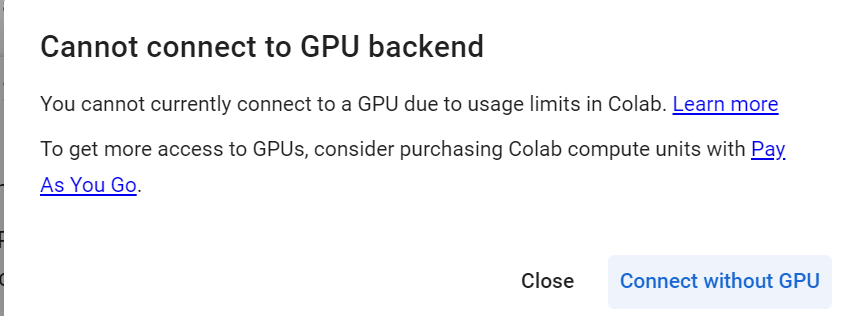

## Installing and Importing Necessary Libraries and Dependencies

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id= _____, #Complete the code to mention the repo id
    filename= _____ #Complete the code to mention the model name
)

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [ ]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [ ]:
response("What treatment options are available for managing hypertension?")

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "_____" #Complete the code to define the query #2
response(_____) #Complete the code to pass the user input

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "_____" #Complete the code to define the query #3
response(_____) #Complete the code to pass the user input

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "_____" #Complete the code to define the query #4
response(_____) #Complete the code to pass the user input

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "_____" #Complete the code to define the query #5
response(_____) #Complete the code to pass the user input

## Question Answering using LLM with Prompt Engineering

In [ ]:
system_prompt = "_____" #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = _____ #Complete the code to pass the query #2
response(_____) #Complete the code to pass the user input

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = _____ #Complete the code to pass the query #3
response(_____) #Complete the code to pass the user input

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = _____ #Complete the code to pass the query #4
response(_____) #Complete the code to pass the user input

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = _____ #Complete the code to pass the query #5
response(_____) #Complete the code to pass the user input

## Data Preparation for RAG

In [ ]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
manual_pdf_path = "_____" #Complete the code to define the file name

In [ ]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [ ]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [ ]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

#### Checking the number of pages

In [ ]:
len(manual)

### Data Chunking

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=_____, #Complete the code to define the chunk size
    chunk_overlap= _____ #Complete the code to define the chunk overlap
)

In [ ]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [ ]:
len(document_chunks)

In [ ]:
document_chunks[0].page_content

In [ ]:
document_chunks[2].page_content

In [ ]:
document_chunks[3].page_content

As expected, there are some overlaps

### Embedding

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name="_____") #Complete the code to define the model name

In [ ]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [ ]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

In [ ]:
embedding_1,embedding_2

### Vector Database

In [ ]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [ ]:
vectorstore = Chroma.from_documents(
    _____, #Complete the code to pass the document chunks
    _____, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

In [ ]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

In [ ]:
vectorstore.embeddings

In [ ]:
vectorstore.similarity_search("_____",k=_____) #Complete the code to pass a query and an appropriate k value

### Retriever

In [ ]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': _____} #Complete the code to pass an appropriate k value
)

In [ ]:
rel_docs = retriever.get_relevant_documents("_____") #Complete the code to pass the query
rel_docs

In [ ]:
model_output = llm(
      "_____", #Complete the code to pass the query
      max_tokens=_____, #Complete the code to pass the maximum number of tokens
      temperature=_____, #Complete the code to pass the temperature
    )

In [ ]:
model_output['choices'][0]['text']

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [ ]:
qna_system_message = "_____"  #Complete the code to define the system message

In [ ]:
qna_user_message_template = "_____" #Complete the code to define the user message

### Response Function

In [ ]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #2
generate_rag_response(_____) #Complete the code to pass the user input

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #3
generate_rag_response(_____) #Complete the code to pass the user input

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #4
generate_rag_response(_____) #Complete the code to pass the user input

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #5
generate_rag_response(_____) #Complete the code to pass the user input

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.5)

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #2
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #3
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #4
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #5
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [ ]:
groundedness_rater_system_message = "_____" #Complete the code to define the prompt to evaluate groundedness

In [ ]:
relevance_rater_system_message = "_____" #Complete the code to define the prompt to evaluate relevance

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [ ]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="_____",_____) #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="_____",_____) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="_____",_____) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="_____",_____) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

## Actionable Insights and Business Recommendations


*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___